# Analyse de la loi de Zipf sur un corpus de Victor Hugo

## 1. Chargement du corpus

### 1.1 Import des bibliothèques

In [2]:
import os
import re
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Je télécharge les ressources NLTK nécessaire
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\safar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\safar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1.2 Lecture du fichier texte

In [3]:
# Je défini le chemin vers le fichier (relatif n'a pas fonctionné donc obligé absolu)
# fichier_path = os.path.join("..", "data", "raw", "Corpus_Victor_Hugo.txt")
fichier_path = "C:/code/projets_perso/zipf-law-project/data/raw/Corpus_Victor_Hugo.txt"


# Lecture du contenu
with open(fichier_path, "r", encoding="utf-8") as file:
    texte = file.read()
    
# Aperçu du txt brut
print(texte[:5000])

                    IL A ÉTÉ TIRÉ À PART


      5 exemplaires sur papier du Japon, numérotés de 1 à 5
     5 exemplaires sur papier de Chine, numérotés de 6 à 10
  40 exemplaires sur papier de Hollande, numérotés de 11 à 50
300 exemplaires sur papier vélin du Marais, numérotés de 51 à 350
       VICTOR HUGO


HISTOIRE D’UN CRIME
TROISIÈME JOURNÉE – LE MASSACRE
QUATRIÈME JOURNÉE – LA VICTOIRE
    CONCLUSION — LA CHUTE



            CAHIER

    COMPLÉMENTAIRE

       I. NOTES DE VICTOR HUGO



       II. PIÈCES JUSTIFICATIVES
                PARIS


  IMPRIMÉ                     ÉDITÉ
    PAR                        PAR

L’IMPRIMERIE               LA LIBRAIRIE
 NATIONALE                 OLLENDORFF




               MDCCCCVII
 FAC-SIMILÉ DU TITRE ÉCRIT PAR VICTOR HUGO EN
TÊTE DU MANUSCRIT ORIGINAL DE L’HISTOIRE D’UN
                     CRIME.
            TROISIÈME JOURNÉE.

                    LE MASSACRE.




                                     I

 CEUX QUI DORMENT ET CELUI
   

## 2. Prétraitement du texte

### 2.1 Nettoyage (ponctuation, majuscules...) et Tokenisation

In [4]:
import re
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords

# Nettoyage du texte : minuscules + suppression ponctuation et chiffres
texte_nettoyé = texte.lower()
texte_nettoyé = re.sub(r'[^a-zàâçéèêëîïôûùüÿñæœ\s-]', ' ', texte_nettoyé)

# Tokenisation
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(texte_nettoyé)

# Chargement des stopwords français
stop_words = set(stopwords.words('french'))

# Filtrage des tokens : je retire les stopwords et les mots trop courts
tokens_filtrés = [mot for mot in tokens if mot not in stop_words and len(mot) > 1]

# Affichage des premiers mots utiles
print(tokens_filtrés[:30])


['tiré', 'part', 'exemplaires', 'papier', 'japon', 'numérotés', 'exemplaires', 'papier', 'chine', 'numérotés', 'exemplaires', 'papier', 'hollande', 'numérotés', 'exemplaires', 'papier', 'vélin', 'marais', 'numérotés', 'victor', 'hugo', 'histoire', 'crime', 'troisième', 'journée', 'massacre', 'quatrième', 'journée', 'victoire', 'conclusion']


### 2.2 Stopwords et filtrage

## 3. Analyse de fréquence des mots

### 3.1 Comptage des occurrences

In [5]:
from collections import Counter

# Comptage de la fréquence des occurences
compteur_mots = Counter(tokens_filtrés)


### 3.2 Classement des mots

In [6]:
# Obtenir les n mots les plus fréquents
mots_freq = compteur_mots.most_common(100)  # top 100
for rang, (mot, freq) in enumerate(mots_freq[:15], start=1):
    print(f"{rang}. {mot} - {freq} occurrences")

1. plus - 665 occurrences
2. cette - 591 occurrences
3. deux - 588 occurrences
4. rue - 581 occurrences
5. dit - 533 occurrences
6. tout - 439 occurrences
7. comme - 401 occurrences
8. général - 393 occurrences
9. où - 383 occurrences
10. fait - 365 occurrences
11. là - 339 occurrences
12. faire - 323 occurrences
13. tous - 311 occurrences
14. bien - 302 occurrences
15. coup - 297 occurrences


## 4. Visualisation : loi de Zipf

### 4.1 Graphique log-log

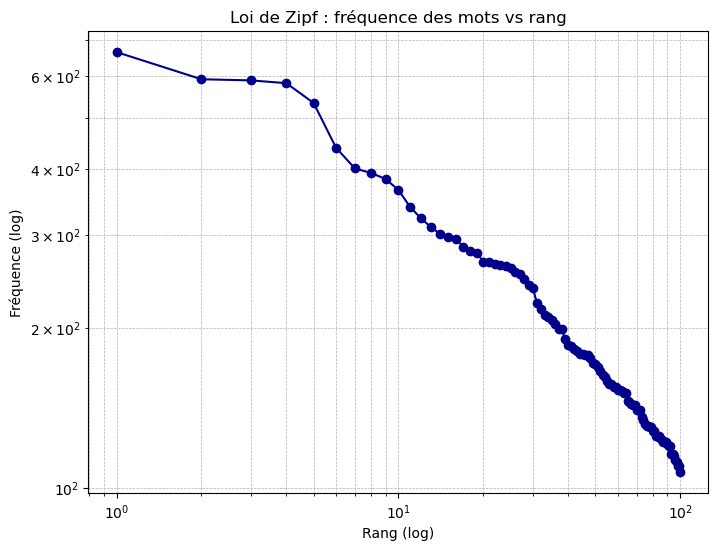

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Extraire les fréquences uniquement
frequences = [freq for mot, freq in mots_freq]
rangs = np.arange(1, len(frequences) + 1)

# Tracé log-log
plt.figure(figsize=(8, 6))
plt.plot(rangs, frequences, marker='o', linestyle='-', color='darkblue')
plt.xscale('log')
plt.yscale('log')
plt.title("Loi de Zipf : fréquence des mots vs rang")
plt.xlabel("Rang (log)")
plt.ylabel("Fréquence (log)")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

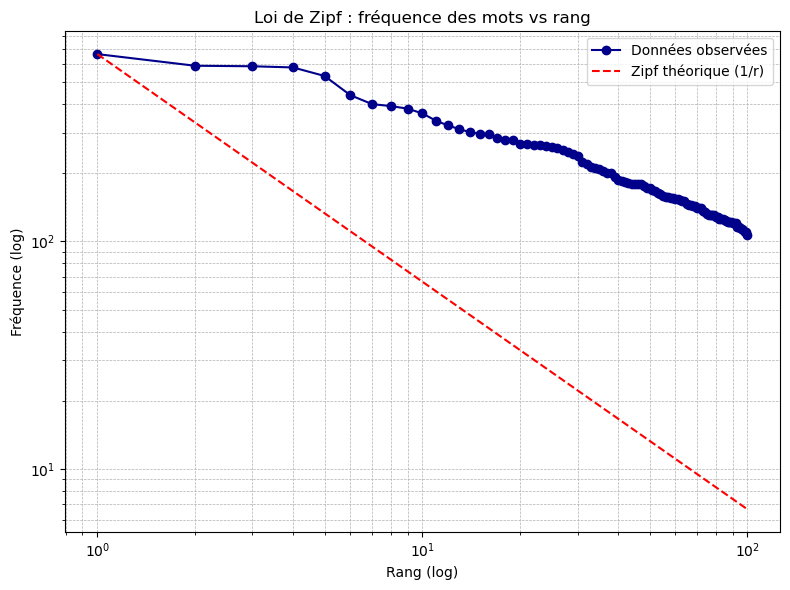

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Extraire les fréquences uniquement
frequences = [freq for mot, freq in mots_freq]
rangs = np.arange(1, len(frequences) + 1)

# Calcul de la courbe théorique : f(r) ~ 1/r
zipf_theorique = [frequences[0] / r for r in rangs]  # normalisée sur le mot le plus fréquent

# Tracé log-log
plt.figure(figsize=(8, 6))

# Courbe empirique (bleu)
plt.plot(rangs, frequences, marker='o', linestyle='-', color='darkblue', label="Données observées")

# Courbe théorique (rouge)
plt.plot(rangs, zipf_theorique, linestyle='--', color='red', label="Zipf théorique (1/r)")

# Mise en forme
plt.xscale('log')
plt.yscale('log')
plt.title("Loi de Zipf : fréquence des mots vs rang")
plt.xlabel("Rang (log)")
plt.ylabel("Fréquence (log)")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### 4.2 Comparaison avec la théorie

**Interprétation des résultats – Loi de Zipf**

L’analyse de fréquence des mots sur le corpus de Victor Hugo révèle que certains mots apparaissent avec une fréquence nettement supérieure aux autres. Par exemple, les mots « plus », « cette » et « deux » dominent avec plusieurs centaines d’occurrences.

Ceci présente alinéation sur l'extraction des stop words.

Lorsque l’on trace la fréquence des mots en fonction de leur rang en échelle log-log, on **observe une courbe décroissante**, mais **elle ne suit pas parfaitement une droite**, comme le prédit la loi de Zipf dans sa forme idéale.

**Pourquoi la courbe n’est-elle pas linéaire ?**

1. **Présence de mots très fréquents encore peu informatifs**
   Malgré le filtrage des stopwords, certains mots fréquents (ex. : « plus », « cette », « où ») sont encore des mots fonctionnels ou semi-grammaticaux qui biaisent la distribution.

2. **Effet de seuil sur les mots les plus fréquents**
   Les premiers mots (top 5 à 10) ont des fréquences bien plus élevées que ce que la loi de Zipf attendrait, ce qui aplatit la pente au début du graphique.

3. **Corpus de taille limitée**
   Plus le corpus est grand, plus la courbe tend à se régulariser. Un corpus plus vaste aurait permis une meilleure approximation linéaire en log-log.

4. **Influence du style littéraire**
   Le style de Victor Hugo, notamment sa richesse lexicale et sa structure narrative, peut aussi affecter la distribution.

---

**Conclusion**

> La tendance générale de la courbe est bien **décroissante**, confirmant une **approximation de la loi de Zipf**.
> Cependant, des **écarts importants sur les premiers rangs** montrent que la loi ne s'applique pas parfaitement sans un **filtrage linguistique plus poussé** et **un corpus plus massif**.

---

## 5. Conclusions et pistes futures

On voit que notre courbe et la courbe théorique ne se rejoignent pas, puisque les 4 premières occurences étaient des stopwords qu'il aurait fallu suuprimer. 

Je vais utiliser un code pour supprimer manuellement les 4 premières occurences. 

Stopwords ajoutés : ['plus', 'cette', 'deux']


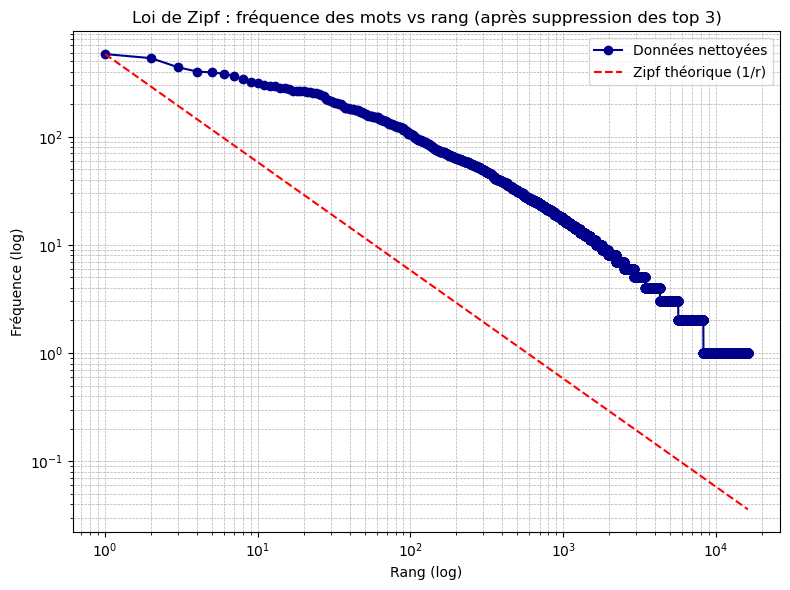

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Étape 1 : Compter les occurrences initiales
compteur = Counter(tokens_filtrés)

# Étape 2 : Extraire les 3 mots les plus fréquents
mots_plus_frequents = [mot for mot, _ in compteur.most_common(3)]
print("Stopwords ajoutés :", mots_plus_frequents)

# Étape 3 : Supprimer ces mots du tableau filtré
tokens_nettoyes = [mot for mot in tokens_filtrés if mot not in mots_plus_frequents]

# Étape 4 : Recalculer les fréquences
compteur_nettoye = Counter(tokens_nettoyes)
mots_freq = compteur_nettoye.most_common()
frequences = [freq for _, freq in mots_freq]
rangs = np.arange(1, len(frequences) + 1)

# Étape 5 : Courbe théorique Zipf (normalisée sur le 1er mot maintenant)
zipf_theorique = [frequences[0] / r for r in rangs]

# Étape 6 : Visualisation log-log
plt.figure(figsize=(8, 6))
plt.plot(rangs, frequences, marker='o', linestyle='-', color='darkblue', label="Données nettoyées")
plt.plot(rangs, zipf_theorique, linestyle='--', color='red', label="Zipf théorique (1/r)")

plt.xscale('log')
plt.yscale('log')
plt.title("Loi de Zipf : fréquence des mots vs rang (après suppression des top 3)")
plt.xlabel("Rang (log)")
plt.ylabel("Fréquence (log)")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()